In this post, you'll see how to add an inset curve to a Matplotlib plot. An inset curve is a small plot laid on top of a main larger plot. The inset curve is smaller that the main plot and typically shows a "zoomed in" region of the main plot.

This is the second post in a series of posts on how to plot stress strain curves with Python and Matplotlib. In the [previous post in the series]({filename}/posts/matplotlib/stress_strain_curve_with_python_and_matplotlib.md) we built a stress strain curve from the data in two .xls data files.

The plot built in the previous post included two lines, axes labels, a title and legend. The data in the plot came from two .xls excel files and was from a tensile test of two metal samples. We are going to build upon that plot by adding an inset curve to it.

## Pre-requisits

In order to build an inset curve with Matplotlib, you'll need to have a couple things in place:

 * A computer
 * Python
 * Matplotlib, NumPy and Pandas
 * Jupyter notebooks (optional)
 * the data
 
**A computer** - to recreate the inset curve in this post, you'll need a computer. A laptop or desktop computer will both work. While it's possible to create the inset curve in this post with a Chromebook, tablet or phone - that's a bit more complicated and beyond the scope of this post

**Python** - You need to have Python installed on your computer. I recommend installing the Anaconda Distribution of Python. See [this post](https://pythonforundergradengineers.com/installing-anaconda-on-windows.html) to see how to install Anaconda on your computer.

**Matplotlib, NumPy and Pandas** - We'll build our inset curve using a Python plotting library called [Matplotlib](https://matplotlib.org/). Matplotlib is one of the most popular Python plotting libraries. If you installed Anaconda, Matplotlib is already installed. If you installed Python from somewhere else, you'll need to install Matplotlib.

You can install Matplotlib, NumPy and Pandas with the Anaconda Prompt using the commands below:

```text
> conda install matplotlib numpy pandas
```

Alternatively, you can use a terminal and the Python package manager **pip** to install Matplotlib, NumPy and Pandas.

```text
$ pip install matplotlib numpy pandas
```

**Jupyter notebooks** - This is optional, but you can enter the code in this post into a Jupyter notebook and see the plot produced in the same Jupyter notebook. Alternatively, you can enter the code into a ```.py``` file and run the ```.py``` file to produce the plot. As long as the Anaconda distribution of Python is installed on your computer, you can see how to open a Jupyter notebook in [this post](https://pythonforundergradengineers.com/opening-a-jupyter-notebook-on-windows.html).

**the data** - The data we are going to plot is from two .xls data files. You can download these files using the links below:

[aluminum6061.xls](#)

[steel1045.xls](#)

Move these .xls data files into the same folder on your computer as the jupyter notebook or .py file that contains your code.

If these pre-requisits are in place, it's time to start building our inset curve.

## Build the main plot

The type of plot we are building is called a stress-strain curve. Stress-strain curves are used by engineers to see how a material elastically and plastically deforms under stress. We are going to add an inset curve to the stress-strain curve that shows the linear elastic region. An inset curve is a small plot that is placed within a plot that shows a zoomed-in view of the larger plot. On our stress-strain curve, the inset curve will show a "zoomed-in" view of the linear elastic region on the plot. 

To build our inset curve, we will use Python and Matplotlib's object-oriented interface. The plot from a [previous post](https://pythonforundergradengineers.com/stress-strain-curve-with-python-and-matpotlib.html), was constructed using Matplotlib's pyplot interface. For a simple plot, the pyplot interface above is sufficient. But our plot with an inset curve is more complicated than just a plot with two lines- we are going to add an inset curve on top of it. Matplotlib's object-oriented interface allows us to access individual components of the plot, like axes, and set specific attributes on these components. This added versitility means we can include an inset curve on top of our main plot.

### Imports

To build our plot with an inset curve, first we need to import a couple modules: NumPy, Pandas, and Matplotlib. These three modules have common import aliases ```np```, ```pd```, and ```plt```. The line ```%matplotlib inline``` is a Jupyter notebook magic command that will show plots directly in a Jupyter notebook. If you are coding your inset curve in a .py file, leave ```%matplotlib inline``` out, as it is not valid Python code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Print Python and package version numbers

The next few lines of code are not necessary, but can be helpful to others who might use our code again. The lines of code below print out to version of Python we are running and the versions of the packages we imported above.

In [2]:
import sys
import matplotlib

print(f"Python Version: {sys.version}")
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")

Python Version: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
NumPy Version: 1.18.5
Pandas Version: 1.0.5
Matplotlib Version: 3.2.2


### Make sure the .xls data files are in the same folder as our code

The two external files that contain the data we are going to plot are linked below:

[aluminum6061.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/aluminum6061.xls)

[steel1045.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/stress_strain_curves/steel1045.xls)

If you are following along and building an inset curve yourself, make sure to download the .xls data files and place these data files in the same directory as you Jupyter notebook or Python script.

A convenient Jupyter notebook magic command, ```%ls```, lists the contents of the current directory (the directory where the notebook is saved). Make sure you can see the two .xls data files in this directory. The ```%ls``` command is not valid Python code, so if you are building your plot in a .py file, make sure to leave ```%ls``` out.

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 42D2-066B

 Directory of C:\Users\Peter\Documents\staticsite\content\code\matplotlib_plots\stress_strain_curves

10/09/2021  04:46 PM    <DIR>          .
10/09/2021  04:46 PM    <DIR>          ..
10/09/2021  04:04 PM    <DIR>          .ipynb_checkpoints
06/25/2019  10:14 PM            36,864 aluminum6061.xls
06/25/2019  10:14 PM    <DIR>          images
06/25/2019  10:14 PM            38,912 steel1045.xls
10/09/2021  04:41 PM            42,905 stress_strain_curve_with_inset.png
10/09/2021  04:46 PM           123,617 stress_strain_curve_with_inset_elastic_region.ipynb
02/13/2020  08:12 PM            88,263 stress_strain_curve_with_python.ipynb
02/13/2020  08:12 PM           113,352 stress-strain_curve.png
               6 File(s)        443,913 bytes
               4 Dir(s)  61,274,304,512 bytes free


We can see the two data files ```aluminum6061.xls``` and ```steel1045.xls``` in the same folder as our Jupyter notebook ```stress_strain_curve_with_inset_elastic_region.ipynb```

Next we need to bring in the data from two external files into variables in our script.

### Read the data with Pandas

Next, we will read in the two .xls data files using Pandas ```pd.read_excel()``` function. The result is two Pandas dataframes that we'll call ```steel_df``` and ```al_df```. 

In [4]:
al_df = pd.read_excel("aluminum6061.xls")
steel_df = pd.read_excel("steel1045.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


We can use Pandas' ```df.head()``` method to view the first five rows of each dataframe.

In [5]:
steel_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,762,1,5.969,0.01284,201.030792,0.001572,-0.007133,NaN,NaN,NaN
1,762,2,6.242,0.01392,215.235886,0.000009,-0.014581,NaN,NaN,NaN
2,762,3,6.936,0.01646,246.816742,-0.000832,0.006942,NaN,NaN,NaN
3,762,4,8.632,0.02340,371.870361,0.002203,0.000776,NaN,NaN,NaN
4,762,5,10.533,0.03110,502.501862,0.001481,0.018102,NaN,NaN,NaN


In [6]:
al_df.head()

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,761,1,6.532,0.01524,201.158508,0.018893,-0.023081,NaN,NaN,NaN
1,761,2,6.702,0.01600,205.978119,0.000265,-0.013024,NaN,NaN,NaN
2,761,3,7.098,0.01720,219.295441,-0.000877,-0.024879,NaN,NaN,NaN
3,761,4,8.697,0.02350,268.505890,0.001453,-0.006798,NaN,NaN,NaN
4,761,5,10.196,0.03004,322.028168,0.001865,0.012563,NaN,NaN,NaN


We see a couple of columns in each dataframe. The columns we are interested in are below:
    
 * **FORCE** Force measurements from the load cell in pounds (lb)
 * **EXT** Extension measurements from the mechanical extensometer in percent (%), strain in percent
 * **CH5** Extension readings from the laser extensometer in percent (%), strain in percent

We will use these columns from the dataframes in the following ways:

 * **FORCE** will be converted to stress using the cross-sectional area of our test samples
 
$$ \sigma = \frac{F}{A_0} $$
 
 * **EXT** (mechanical exstensometer readings) will be converted into strain on our inset cuve
 
$$ \epsilon_{unitless} = \epsilon_{\%} \times 0.01 $$
 
 * **CH5** (laser extensometer readings) will be converted into strain on the overall, large stress strain curve
 
$$ \epsilon_{unitless} = \epsilon_{\%} \times 0.01 $$

In [7]:
strain_al_plastic = al_df['CH5']*0.01
strain_al_elastic = al_df['EXT']*0.01
d_al = 0.506
stress_al = (al_df['FORCE']*0.001)/(np.pi*((d_al/2)**2))

strain_steel_plastic = steel_df['CH5']*0.01
strain_steel_elastic = steel_df['EXT']*0.01
d_steel = 0.506
stress_steel = (steel_df['FORCE']*0.001)/(np.pi*((d_steel/2)**2))

### Build a simple plot

Now that we have the data in 6 pandas series, we can build a simple plot. We'll use Matplotlib's object-oriented interface to create two objects, a figure object called ```fig``` and an axes object ```ax1```. Then we can run the ```.plot()``` method on our ```ax1``` object and pass in two sets of series. The command ```plt.show()``` shows the plot.

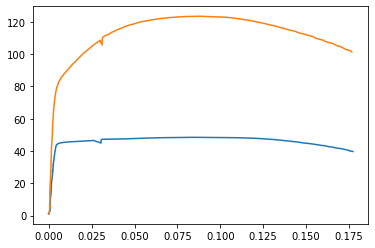

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
plt.show()

We see a plot (a stress-strain curve) with two lines. But right now, the plot looks pretty bare. We can spruce it up a bit with axis labels, a title and a legend.

### Add axis labels, a title and a legend

Next let's use Matplotlib's object-oriented interface to add axis labels and titles. Below is a chart that relates how to use Matplotlib's ```plt``` approach, compared to the object-oriented approach that we'll use.

| plot component | ```plt``` approach | object-oriented approach |
| --- | --- | --- |
| x-axis label | ```plt.xlabel('strain')``` | ```ax.set_xlabel('strain')``` |
| y-axis label | ```plt.ylabel('stress``` | ```ax.set_xyabel('stress')``` |
| title | ```plt.title('stress strain curve')``` | ```ax.set_title('stress strain curve')``` |
| legend | ```plt.legend(['Al6061','Steel1045])``` | ```ax.legend(['Al6061','Steel1045])``` |

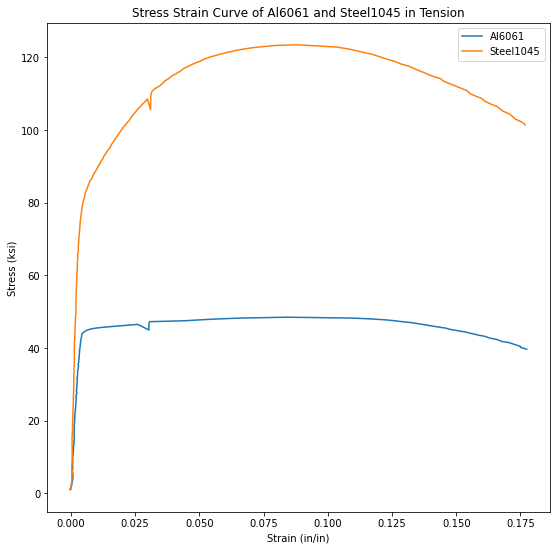

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches([9,9])
ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
ax1.legend(['Al6061','Steel1045'])
ax1.set_xlabel('Strain (in/in)')
ax1.set_ylabel('Stress (ksi)')
ax1.set_title('Stress Strain Curve of Al6061 and Steel1045 in Tension')

plt.show()

We see a plot with two lines, axis labels, a title and a legend. Now, onto adding the inset curve!

### Add the inset curve

Next, let's add the inset curve. Our inset curve is a "zoomed-in" view of the linear elastic region (the far left almost vertical portion of the stress-strain curves. To create a plot on top of another plot, we'll use Matplotlib's ```fig.add_axes([ ])``` method. This method outputs a new axis object ```ax2```. ```ax2``` will be the axes that we plot the inset curve on. We can set attributes like ```.set_xlabel()``` on our ```ax2``` object to add labels to the axis, add a title, and limit the x and y axis so we only show the left-most portion of the curve.

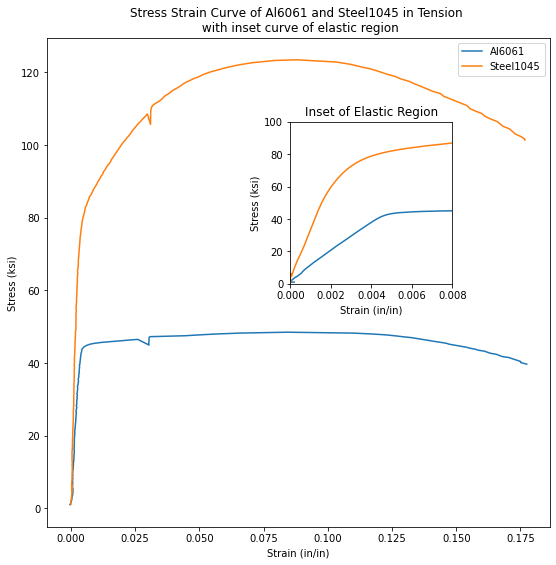

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches([9,9])

ax1.plot(strain_al_plastic,stress_al,strain_steel_plastic,stress_steel)
ax1.legend(['Al6061','Steel1045'])
ax1.set_xlabel('Strain (in/in)')
ax1.set_ylabel('Stress (ksi)')
ax1.set_title('Stress Strain Curve of Al6061 and Steel1045 in Tension \n with inset curve of elastic region')

left, bottom, width, height = [0.5, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(strain_al_elastic,stress_al,strain_steel_elastic, stress_steel)
ax2.set_xlabel('Strain (in/in)')
ax2.set_ylabel('Stress (ksi)')
ax2.set_title('Inset of Elastic Region')
ax2.set_xlim([0,0.008])
ax2.set_ylim([0,100])

fig.savefig('stress_strain_curve_with_inset.png')

plt.show()

We see a plot that contains an inset curve. The inset curve has two lines, just like the large plot. The inset curve has axis labels and a title. The same colors in the main plot is used in the inset plot. The inset curve shows a "zoomed" view of the larger plot. Not how the x-axis and the y-axis limits of the main plot and the inset plot are different.

## Summary

In this post, we plotted a stress strain curve with Python and Matplotlib. We used Matplotlib's object oriented interface to build the inset curve. Our inset curve was added on top of our main plot. The import code to remember if you want to add an inset curve to a Matplotlib plot is below:

```python
fig, ax1 = plt.subplots()

ax1.plot(x,y)

left, bottom, width, height = [0.5, 0.5, 0.25, 0.25] # modify to move the inset curve and change its size
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,y)

plt.show()
```